Name: Adnan Shaikh<br>
Division: B<br>
Roll No: 28<br>
College: Keystone School of Engineering<br>

All AIs are machine learning but not all machine learning is AI. AI is superset of machine learning.

In [171]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv("C:\AdnanData\projects\codingResources\datasets\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


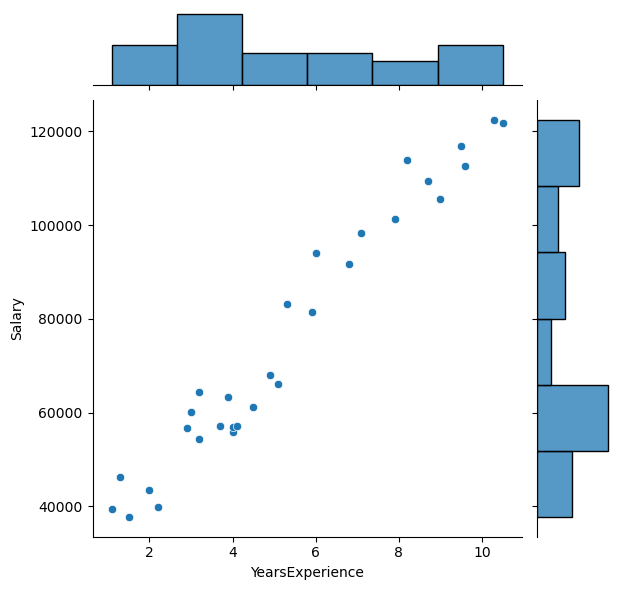

In [173]:
sns.jointplot(x=df['YearsExperience'], y=df['Salary'])

In [174]:
#reshaping example
x = df['YearsExperience']
y = df['Salary']

#so that calc for each value happens parallely
x = x.values.reshape(30, 1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

### Cross Validation

In [175]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)
#random state: basically randomness type 42
#test_size: split proportiong, 0.25 meaning 25% is used for test
display(x_test)
display(y_test)

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7]])

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
Name: Salary, dtype: float64

### Build Linear Regression Model

In [176]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [177]:
lr.fit(x_train, y_train)

LinearRegression()

### Evaluation

In [178]:
y_pred = lr.predict(x_test)
y_pred

array([115439.88180109,  71396.10622651, 102320.45928951,  75144.51265839,
        55465.37889103,  60150.88693088, 121999.59305688, 107005.96732936])

In [179]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

5056.995466663594

In [180]:
from sklearn.metrics import mean_squared_error

mean_squared_error (y_test, y_pred)

38802588.99247065

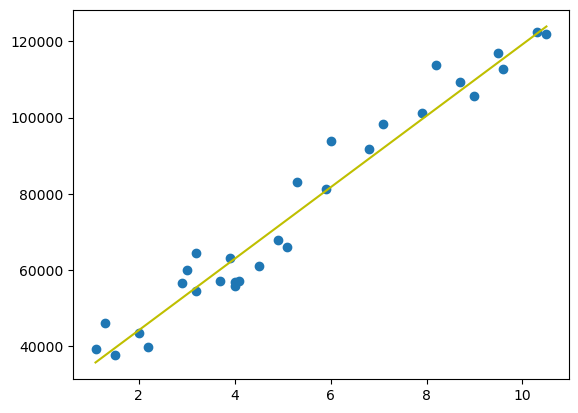

In [181]:
plt.scatter(x, y)
plt.plot(x, lr.predict(x), color='y')

### Decision Tree

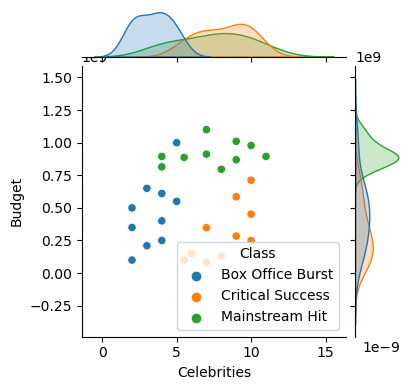

In [182]:
df = pd.read_csv("C:\AdnanData\projects\codingResources\datasets\movies.csv")
sns.jointplot(x=df['Celebrities'], y=df['Budget'], hue=df['Class'], height = 4)

In [183]:
x = df[['Budget', 'Celebrities']]
y = df['Class']

In [184]:
x_test, x_train, y_test, y_train = train_test_split(x, y, random_state = 42, test_size = 0.25)

[Text(0.4, 0.8333333333333334, 'Budget <= 551000000.0\ngini = 0.625\nsamples = 8\nvalue = [2, 2, 4]\nclass = Mainstream Hit'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Critical Success'),
 Text(0.6, 0.5, 'Celebrities <= 6.0\ngini = 0.444\nsamples = 6\nvalue = [2, 0, 4]\nclass = Mainstream Hit'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Box Office Burst'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = Mainstream Hit')]

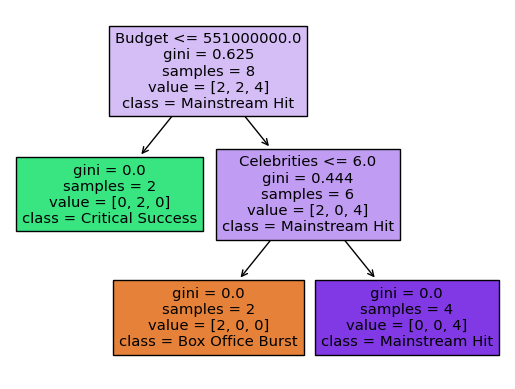

In [185]:
#to create a decision tree
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()
dt.fit (x_train, y_train)

#to display decision tree
from sklearn.tree import plot_tree

plot_tree(dt, feature_names = df[['Budget', 'Celebrities']].columns, class_names = df['Class'].unique(), filled=True)

### Training a Model

In [186]:
df = pd.read_csv("C:/AdnanData/projects/codingResources/datasets/banknotes.csv")
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [187]:
y.value_counts()

Class
Box Office Burst    10
Critical Success    10
Mainstream Hit      10
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

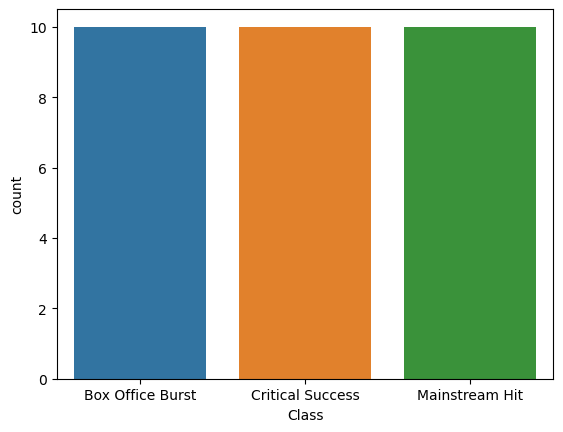

In [188]:
sns.countplot(x=y)

[Text(0.5952380952380952, 0.9375, 'Variance <= 0.32\ngini = 0.49\nsamples = 412\nvalue = [235, 177]\nclass = 0'),
 Text(0.38095238095238093, 0.8125, 'Skewness <= 7.44\ngini = 0.331\nsamples = 201\nvalue = [42, 159]\nclass = 1'),
 Text(0.23809523809523808, 0.6875, 'Variance <= -0.396\ngini = 0.133\nsamples = 167\nvalue = [12, 155]\nclass = 1'),
 Text(0.09523809523809523, 0.5625, 'Variance <= -1.783\ngini = 0.068\nsamples = 142\nvalue = [5, 137]\nclass = 1'),
 Text(0.047619047619047616, 0.4375, 'gini = 0.0\nsamples = 95\nvalue = [0, 95]\nclass = 1'),
 Text(0.14285714285714285, 0.4375, 'Curtosis <= 5.989\ngini = 0.19\nsamples = 47\nvalue = [5, 42]\nclass = 1'),
 Text(0.09523809523809523, 0.3125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]\nclass = 1'),
 Text(0.19047619047619047, 0.3125, 'Skewness <= -3.186\ngini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = 0'),
 Text(0.14285714285714285, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.23809523809523808, 0.1875, 'gin

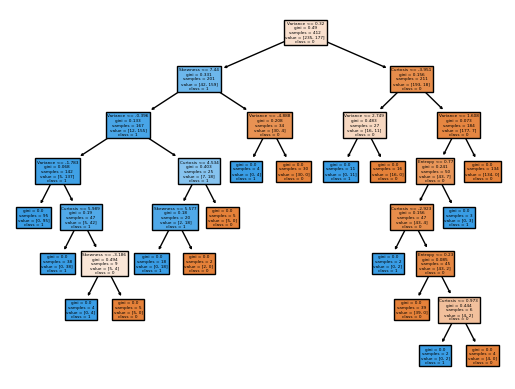

In [189]:
x = df.drop('Class', axis=1)
y = df['Class']

x_test, x_train, y_test, y_train = train_test_split(x, y, random_state = 1, test_size = 0.3)

dt.fit(x_train, y_train)

plot_tree(dt, feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'], class_names=df['Class'].unique().astype('str'), filled=True)

In [190]:
#to train the model
y_pred = dt.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [191]:
#to check the accuracy by comparing y_pred with y_test
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9802083333333333

In [192]:
#for detailed report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       527\n           1       0.98      0.98      0.98       433\n\n    accuracy                           0.98       960\n   macro avg       0.98      0.98      0.98       960\nweighted avg       0.98      0.98      0.98       960\n'

In [193]:
#to create the conf matrix:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)
conf

array([[517,  10],
       [  9, 424]], dtype=int64)

<Axes: >

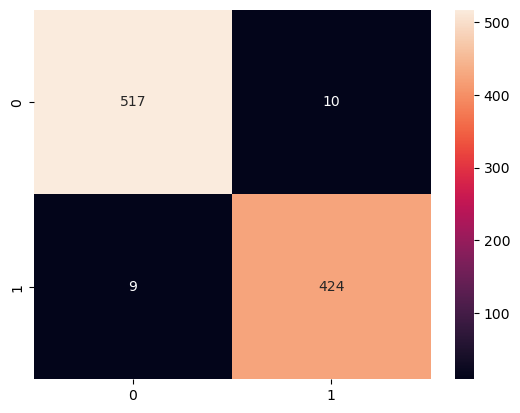

In [194]:
#plting the conf matrix on a heatmap
#using fmt='d' so the annotations are displayed in decimal form
sns.heatmap(conf, annot = True, fmt='d')

### Feature Importance

In [195]:
#calc feature importance
imp = dt.feature_importances_
imp

array([0.63057115, 0.22364549, 0.11668035, 0.02910301])

<BarContainer object of 4 artists>

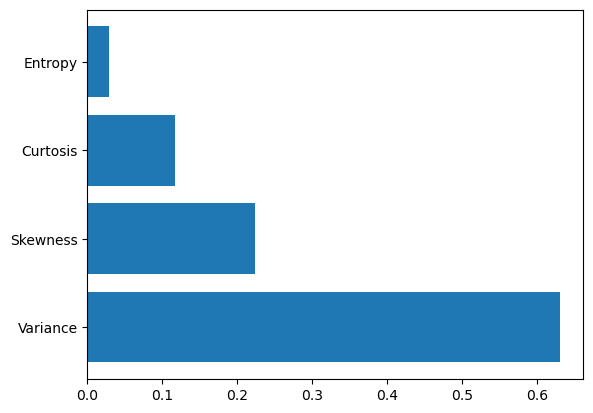

In [196]:
#plotting feature's imp
plt.barh(x.columns, imp)

### Clustering

In [197]:
df = pd.read_csv("C:\AdnanData\projects\codingResources\datasets\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [198]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'Spending Score (1-100)')

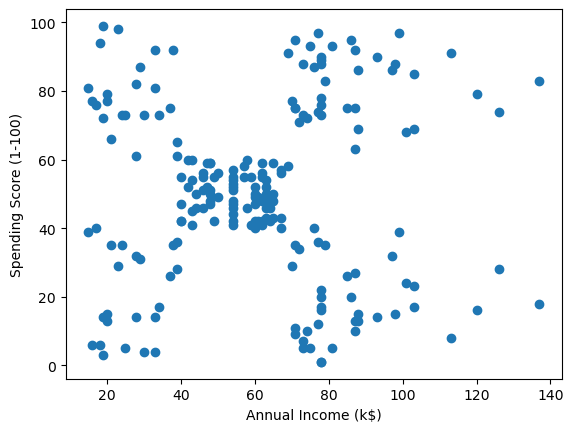

In [199]:
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [200]:
from sklearn.cluster import KMeans

#forming empty cluster objects
km = KMeans(n_clusters = 20, random_state = 0)

#fitting entries from x on the clusters to form the structure of the cluster
km.fit(x)

#predict what entries go into which clusters
km.predict(x)

array([ 2, 17,  5, 17,  2, 17,  5,  4,  5, 17,  5,  4,  5, 17,  5, 17,  2,
       17,  2,  4,  2, 17,  5, 17,  5,  4,  2, 17,  2,  4,  5, 17,  5,  4,
        5,  4,  5, 17,  9, 17,  9,  4,  9,  8,  9,  8,  8, 19,  9,  9,  8,
        8,  8,  8, 19,  9, 19, 19, 19, 19,  8,  8, 19,  8, 19,  8, 19, 19,
        8, 19,  8, 19, 19,  8, 19, 18, 19, 19, 19, 19, 19, 18, 19, 19, 18,
       19, 18, 18, 18,  1, 18,  1,  1,  1,  1, 18,  1,  1,  1,  1,  1,  1,
       18, 18, 18,  1,  1,  1,  1,  1, 18, 18,  1,  1,  1,  1,  1, 18,  1,
       18, 18,  1, 18,  3, 14, 13, 14,  3, 15, 13, 15, 13, 14, 13, 15,  3,
       15, 13, 15, 13, 15,  3, 14,  3, 15,  3, 14, 13, 11,  3, 11,  3, 11,
       13, 11,  3, 15, 13, 15, 13, 14,  3, 15,  3, 11, 13, 11,  7, 11, 12,
        0, 12,  0,  7,  0,  7,  0, 12,  0,  7, 16,  7,  0,  7, 16,  7, 16,
       12, 16,  7, 16, 12, 10,  6, 10,  6, 10,  6, 10,  6])

In [201]:
#sum squared error of the current clusters
km.inertia_

8072.938214428368

In [202]:
import warnings
warnings.filterwarnings('ignore')

sse = []


for k in range(1, 16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)
    
sse

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30273.39431207004,
 25029.253424935883,
 22143.22210076745,
 19669.30155714829,
 17546.928000046548,
 15961.902986261051,
 14285.000492043215,
 13163.71060573957,
 12329.602569068358]

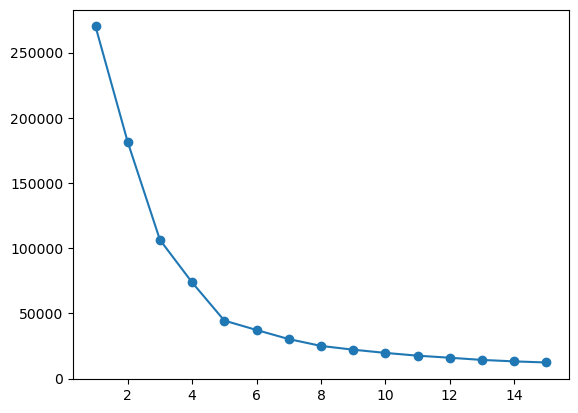

In [203]:
plt.plot(range(1, 16), sse, marker = 'o')